<a href="https://colab.research.google.com/github/estebanhernandezr/DNA-compression/blob/master/Entropy_revisited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from typing import BinaryIO, Dict, Sequence, Tuple
import numpy as np
from math import log
import matplotlib.pyplot as plt
import string
import random

#Entropy

##Hyper-parameters

In [2]:
base = 2
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',' k', 'l', 'm',
            'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'z']

##Entropy by *Ralph Hartley* (1928)
A quantitative measure of information was presented in *Bell System Technical
Journal* already 1928 by *Ralph Hartley*: *the information content*, $I_H$, in a
message consisting of $n$ characters, each of them chosen from an alphabet
of $N$ different symbols, should be proportional to the length $n$ multiplied
by some function of the size of the alphabet, $f(N)$, so that $I_H = nf(N)$.

The functional form of *the information content* is supported by the argument that if the message is coded using an alphabet of different size $N_0$ resulting in another length $n_0$, then *the information content* should not change: $I_H = n_0f(N_0)$. The function $f$ that preserves the *information content* is $log_K$, where $K$ is an arbitrary base of the logarithm: different $K$ just results in a scaling of *the information content*.

Therefore, *Ralph Hartley* formulated *the information content* as
$$I_H(n,N)=n\,log_{K}(N),$$
where $n$ is the length of the message and $N$ is the cardinality of the alphabet.


In [3]:
def Message_Hartley_Entropy(message: str, alpha: int) -> float:
    entropy_per_message: float = len(message)*log(alpha, base)
    return entropy_per_message

def Symbol_Hartley_Entropy(message: str, alpha: int) -> float:
    entropy_per_message: float = len(message)*log(alpha, base)
    entropy_per_symbol: float = entropy_per_message/len(message)
    return entropy_per_symbol

*Hartley*'s approach, nonetheless, builds upon the worst case escenario: all symbols are equally likely to appear next in the sequence, as we may witness with the *Shannon's information content (generalized) formulation*, in the next subsection.

As a matter of fact, the *Hartley's information content* does not depend on the sequence itself, but only on its lenght and the length of the alphabet it was written with: really, not even on the symbols themselves. Indeed, we could have omitted passing the message string to the *Message_Hartley_Entropy* and *Symbol_Hartley_Entropy* functions, as a parameter: it's up to the programmer.

The previous is illustrated below.

**FACT**: Whenever we generate a random sequence of characters, taken from any alphabet, we will always get the same value for the *Hartley's information content* measure, as long as the length of the sequence stays the same as well as the length of the alphabet.

Try it yourself...

In [9]:
n = 100
print('length of the message:', n)
print('size of the alphabet:', len(string.ascii_letters), end='\n\n')

cad = ''.join(random.choice(string.ascii_letters) for _ in range(n))
print('random message:', cad, end='\n\n')
print('message entropy:', Message_Hartley_Entropy(cad, len(alphabet)))
print('symbol entropy:', Symbol_Hartley_Entropy(cad, len(alphabet)))

length of the message: 100
size of the alphabet: 52

random message: qYqiYqVbzLRaHcCLFLvggfOdUGbjEwyFkbqucjOqEzqBARfYAwKQGrqGJcpIzgHfnZYvfumrpjNYiUlGvADnoNzRuWKUvpbbvEqS

message entropy: 464.38561897747246
symbol entropy: 4.643856189774724


As a matter of fact, here is some subtle detail that is worth noting: different values for the base $K$ results just in a scaling of the *Hartley's information content*. We show this by interpretating $K$ in terms of combinatory.

What we got is a scaling of a logaritmic function for the *Hartley's information content* in the message: the scaling factor is the length of the message; the logaritmic function, the *Hartley's information content* per symbol, depends not only on the size of the alphabet, but also on the base $K$. Indeed, we would like to generate $N$ different symbols with an alphabet of $K$ symbols (encode). For that end, note that
$$N=K^{log_{K}(N)}.$$
In this context, the quantity $log_{K}(N)$ is interpreted as the exact number of *placeholders* needed to form $N$ different combinations with $K$ symbols.  

By the *pigeonhole principle*, if $K<N$, then at least one of the $N$ symbols must be encoded with two or more of the $K$ symbols *i.e* the number of *placeholders*, $log_{K}(N)$, must be grater or equal than $2$, in order to asign each symbol a unique code. For fixed $K$, $log_{K}(N)$ is an increasing function of $N$. However, for $N'>N$, one can match combinations of two or more symbols from the smaller alphabet to the remaining unmatched $N'-N$ symbols in the larger alphabet. Therefore, the number of *placeholders*, $log_{K}(N)$, increase, but at the same time, the message itself can be written in the new alphabet with less symbols: since combinations of symbols in the smaller alphabet can be written as only one symbol from the larger alphabet. So, there will be more *placeholders* per symbol, but less symbols, in the code.

The most straightforward way to illustrate this is with the powers of a given alphabet size $N$: $N^{2}$, $N^{3}$, ..., $N^{p}$. For the sizes of alphabet therein you can interpolate safely, as long as $log_{K}(⋅)$ is an monotically increasing function of its argument. In this case, all $N$ symbols of the smaller alphabet are asigned to the "first" $N$ symbols of the larger alphabet. Then, the remaining $N^{p-1}$ symbols in the larger alphabet can be matched with all the $p$-length combinations of symbols from the smaller alphabet. This reduces the length of the message from $n$ symbols to $\frac{n}{p-1}$.

Try it yourself...

In [15]:
n = 100

powers = 9
for size in range(1, powers, 1):
    print('length of the message:', n)
    print('size of the alphabet:', len(string.ascii_letters), end='\n\n')

    cad = ''.join(random.choice(string.ascii_letters) for _ in range(int(n/size)))
    print('sequence:', cad, end='\n\n')
    print('message entropy:', Message_Hartley_Entropy(cad, n**size))
    print('symbol entropy:', Symbol_Hartley_Entropy(cad, n**size), end='\n\n\n')

length of the message: 100
size of the alphabet: 52

sequence: otykVHlMXLIWKRWLklrCdpXsNZGlasmqZeRmfmmNYLIvkwJaxABVFidlDBksBnUojkUilpEdNssENUIGYjCBRINUVxGaVbGpzoPZ

message entropy: 664.3856189774725
symbol entropy: 6.643856189774725


length of the message: 100
size of the alphabet: 52

sequence: WPiXNXGvWJEDGpvpCsHBYcsdILpNMsYmeCZurfMFdnvebgqdhw

message entropy: 664.3856189774725
symbol entropy: 13.28771237954945


length of the message: 100
size of the alphabet: 52

sequence: igjALzKARJWKXesCiEmYxxhBeFVjRbkRQ

message entropy: 657.7417627876978
symbol entropy: 19.931568569324174


length of the message: 100
size of the alphabet: 52

sequence: YHTKXWeXUwEwbYCGElzSbxbew

message entropy: 664.3856189774725
symbol entropy: 26.5754247590989


length of the message: 100
size of the alphabet: 52

sequence: eCNsBOTMxBxWaLSUuSPo

message entropy: 664.3856189774725
symbol entropy: 33.219280948873624


length of the message: 100
size of the alphabet: 52

sequence: oFgpOzAAzTSuzTcF

message en

In [5]:
Message_Hartley_Entropies = []
Symbol_Hartley_Entropies = []

n = 100
m = 10

cad = ''.join(random.choice(string.ascii_letters) for _ in range(n))
for i in range(1, m, 1):
    Message_Hartley_Entropies.append(Message_Hartley_Entropy(cad, i))
    Symbol_Hartley_Entropies.append(Symbol_Hartley_Entropy(cad, i))

Note that we fixed the message length: while the message can be anything, its size is always $n$. On the other side, the size of the alphabet passed to the function varies with the for-loop variable: from 1 to $m$, symbols in the alphabet. Try changing the value of $m$ in the code cell above to change the graphs below.

When the size of the alphabet varies, the next is what we get:

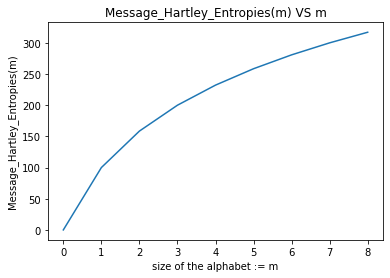

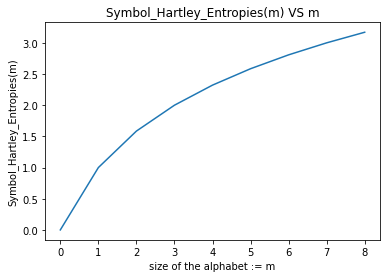

In [6]:
plt.title('Message_Hartley_Entropies(m) VS m')
plt.xlabel('size of the alphabet := m')
plt.ylabel('Message_Hartley_Entropies(m)')
plt.plot(Message_Hartley_Entropies)
plt.show()
plt.title('Symbol_Hartley_Entropies(m) VS m')
plt.xlabel('size of the alphabet := m')
plt.ylabel('Symbol_Hartley_Entropies(m)')
plt.plot(Symbol_Hartley_Entropies)
plt.show()

As expected, what we see is a scaling of a logaritmic function for the *Hartley's information content* in the message: the scaling factor is the length of the message; the logaritmic function, the *Hartley's information content* per symbol, grows with the size of the alphabet.

Beyond that, what really matters is how this may be interpreted, because every quantity involved has its physical meaning.

As we mentioned earlier, what *Hartley* really wanted to capture.

##Entropy by *Claude Shannon* (1948)